<a href="https://colab.research.google.com/github/DioSurreal/Loan-Approval-Project/blob/master/experiment_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pycaret
import pycaret.classification
from pycaret.classification import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pycaret.__version__

'3.3.2'

In [23]:
df = pd.read_csv('loan_analyzed.csv')
df.head()

,age_group,employment_status,credit_score,diff_income_to_expenses,debt_to_income_ratio,loan_approval_status
0,Middle Adult,Employed,743,9125.416667,0.141686,1
1,Middle Adult,Employed,468,-2277.500000,0.865750,0
2,Middle Age,Self-Employed,389,-1135.083333,0.497969,0
3,Middle Adult,Self-Employed,778,8755.750000,0.207525,1
4,Middle Adult,Employed,752,5164.750000,0.107397,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50499 entries, 0 to 50498
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_group                50499 non-null  object 
 1   employment_status        50499 non-null  object 
 2   credit_score             50499 non-null  int64  
 3   diff_income_to_expenses  50499 non-null  float64
 4   debt_to_income_ratio     50499 non-null  float64
 5   loan_approval_status     50499 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 2.3+ MB


In [4]:
# ตรวจสอบว่า DataFrame มีฟีเจอร์เหล่านี้หรือไม่
data = df.copy()
data.head()

,age_group,employment_status,credit_score,annual_income,diff_income_to_expenses,debt_to_income_ratio,loan_approval_status
0,Middle Adult,Employed,743,139901,9125.416667,0.141686,1
1,Middle Adult,Employed,468,21162,-2277.500000,0.865750,0
2,Middle Age,Self-Employed,389,27815,-1135.083333,0.497969,0
3,Middle Adult,Self-Employed,778,137853,8755.750000,0.207525,1
4,Middle Adult,Employed,752,81753,5164.750000,0.107397,1


In [25]:
s = setup(data, target = 'loan_approval_status', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,loan_approval_status
2,Target type,Binary
3,Original data shape,"(50499, 7)"
4,Transformed data shape,"(50499, 12)"
5,Transformed train set shape,"(35349, 12)"
6,Transformed test set shape,"(15150, 12)"
7,Numeric features,4
8,Categorical features,2
9,Preprocess,True


In [6]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [7]:
get_config('X_train_transformed')

,age_group_Middle Age,age_group_Middle Adult,age_group_Early Retirement,age_group_Young Adult,employment_status_Self-Employed,employment_status_Employed,employment_status_Unemployed,credit_score,annual_income,diff_income_to_expenses,debt_to_income_ratio
45393,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.216758,0.353176,0.479397,0.300121
4941,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.863388,0.680258,0.604659,0.143353
8660,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.854281,0.391687,0.338617,0.216430
33985,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.438980,0.332513,0.380959,0.005443
34976,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.892532,0.778274,0.703747,0.148374
...,...,...,...,...,...,...,...,...,...,...,...
48924,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.881603,0.880736,0.845581,0.084160
1539,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.863388,0.413096,0.423034,0.034006
33787,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.092896,0.232758,0.195297,0.273334
11771,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.969035,0.946857,0.899345,0.114025


In [8]:
get_config('y')

45393    0
4941     1
8660     0
33985    0
34976    1
        ..
21988    1
24979    1
46307    1
42515    0
46508    0
Name: loan_approval_status, Length: 50499, dtype: int8

In [26]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8501,0.8149,0.9331,0.8501,0.8896,0.6574,0.6645,0.1480
lr,Logistic Regression,0.8500,0.8145,0.9331,0.8499,0.8896,0.6572,0.6643,0.0820
ada,Ada Boost Classifier,0.8500,0.8137,0.9331,0.8500,0.8896,0.6573,0.6644,0.2340
gbc,Gradient Boosting Classifier,0.8499,0.8132,0.9330,0.8500,0.8895,0.6571,0.6642,0.6910
lda,Linear Discriminant Analysis,0.8499,0.8144,0.9332,0.8498,0.8895,0.6570,0.6641,0.0380
ridge,Ridge Classifier,0.8497,0.8144,0.9332,0.8495,0.8894,0.6564,0.6636,0.0440
catboost,CatBoost Classifier,0.8497,0.8148,0.9328,0.8498,0.8894,0.6567,0.6637,4.3550
svm,SVM - Linear Kernel,0.8494,0.8135,0.9336,0.8489,0.8892,0.6555,0.6629,0.0600
rf,Random Forest Classifier,0.8479,0.8138,0.9302,0.8493,0.8879,0.6529,0.6595,0.8190
et,Extra Trees Classifier,0.8440,0.8119,0.9267,0.8469,0.8850,0.6441,0.6505,0.4020


In [49]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [27]:
best

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [51]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8501,0.8150,0.9332,0.8500,0.8896,0.6574,0.6645,0.140
ada,Ada Boost Classifier,0.8499,0.8141,0.9330,0.8499,0.8895,0.6570,0.6641,0.254
catboost,CatBoost Classifier,0.8499,0.8131,0.9330,0.8499,0.8895,0.6571,0.6642,4.462
gbc,Gradient Boosting Classifier,0.8498,0.8132,0.9330,0.8498,0.8895,0.6569,0.6640,0.829
rf,Random Forest Classifier,0.8492,0.8161,0.9322,0.8497,0.8890,0.6557,0.6626,1.000
lr,Logistic Regression,0.8491,0.8144,0.9334,0.8487,0.8890,0.6549,0.6622,1.079
lda,Linear Discriminant Analysis,0.8489,0.8142,0.9334,0.8485,0.8889,0.6545,0.6619,0.042
ridge,Ridge Classifier,0.8488,0.8142,0.9334,0.8484,0.8888,0.6542,0.6616,0.046
svm,SVM - Linear Kernel,0.8484,0.8143,0.9334,0.8479,0.8886,0.6532,0.6607,0.047
et,Extra Trees Classifier,0.8469,0.8153,0.9295,0.8486,0.8872,0.6506,0.6572,0.453


In [28]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8492,0.8113,0.9362,0.8470,0.8894,0.6545,0.6626
1,0.8487,0.8172,0.9244,0.8539,0.8878,0.6566,0.6615
2,0.8563,0.8167,0.9406,0.8527,0.8945,0.6710,0.6790
3,0.8484,0.8105,0.9332,0.8480,0.8885,0.6532,0.6606
4,0.8487,0.8201,0.9323,0.8488,0.8886,0.6542,0.6613
5,0.8405,0.8023,0.9227,0.8452,0.8823,0.6364,0.6423
6,0.8509,0.8140,0.9349,0.8499,0.8904,0.6590,0.6663
7,0.8453,0.8133,0.9341,0.8438,0.8866,0.6449,0.6533
8,0.8557,0.8115,0.9406,0.8521,0.8941,0.6694,0.6775


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [29]:
# define tuning grid
lightgbm_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 150, 200],
    'max_depth': [ 2, 4, 6, 8, 10, 12, 20],
    'num_leaves': [20, 31, 40],
    'min_child_samples': [20, 30],
    'colsample_bytree': [0.8, 1.0]
}

# tune model with custom grid and metric = F1
tuned_lightgbm,tuner = tune_model(lightgbm, custom_grid = lightgbm_grid, optimize = 'F1', return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8492,0.8087,0.9362,0.8470,0.8894,0.6545,0.6626
1,0.8487,0.8170,0.9244,0.8539,0.8878,0.6566,0.6615
2,0.8563,0.8129,0.9406,0.8527,0.8945,0.6710,0.6790
3,0.8484,0.8196,0.9332,0.8480,0.8885,0.6532,0.6606
4,0.8487,0.8195,0.9323,0.8488,0.8886,0.6542,0.6613
5,0.8405,0.8074,0.9227,0.8452,0.8823,0.6364,0.6423
6,0.8509,0.8133,0.9349,0.8499,0.8904,0.6590,0.6663
7,0.8453,0.8198,0.9341,0.8438,0.8866,0.6449,0.6533
8,0.8557,0.8246,0.9406,0.8521,0.8941,0.6694,0.6775


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [30]:
# tuned_dt, tuner = tune_model(dt, return_tuner=True)
lightgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [31]:

tuned_lightgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [56]:
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['credit_score',
                                                                          'loan_amount_requested',
                                                                          'annual_income',
                                                                          'diff_income_to_expenses',
                                                                          'debt_to_income_ratio'],
                                                                 transformer=SimpleImputer(add...
                                                                            0.1],
                                        'actual_estimator__max_depth': [2, 4, 6,
                                                                        8, 10,
                                                                        12,
                                                                        20],
                                        'actual_estimator__min_child_samples': [20,
                                                                                30],
                                        'actual_estimator__n_estimators': [100,
                                                                           150,
                                                                           200],
                                        'actual_estimator__num_leaves': [20, 31,
                                                                         40]},
                   pre_dispatch='2*n_jobs', random_state=123, refit=False,
                   return_train_score=False,
                   scoring=make_scorer(f1_score, response_method='predict', average=weighted),
                   verbose=1)

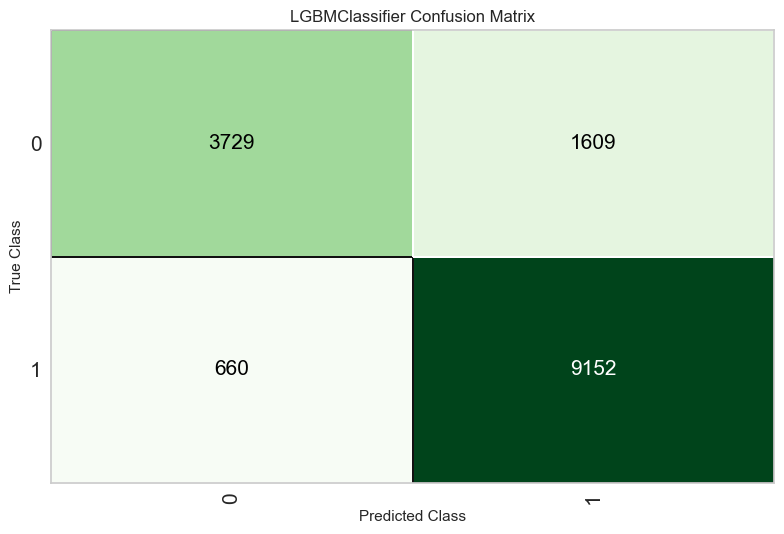

In [32]:
plot_model(best, plot = 'confusion_matrix')

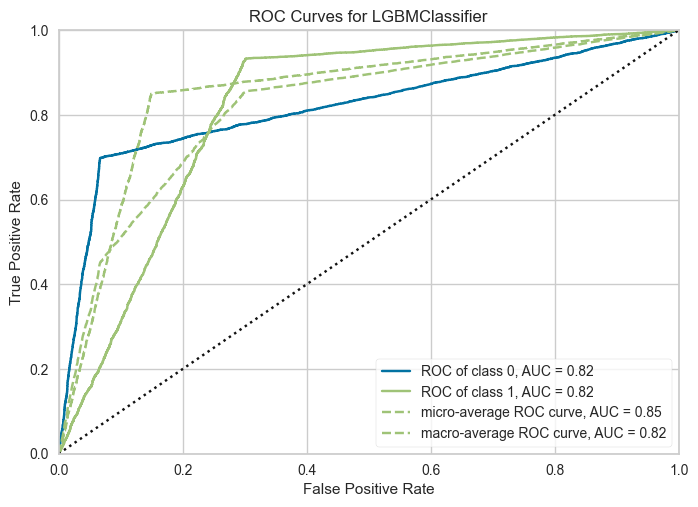

In [33]:
plot_model(best, plot = 'auc')

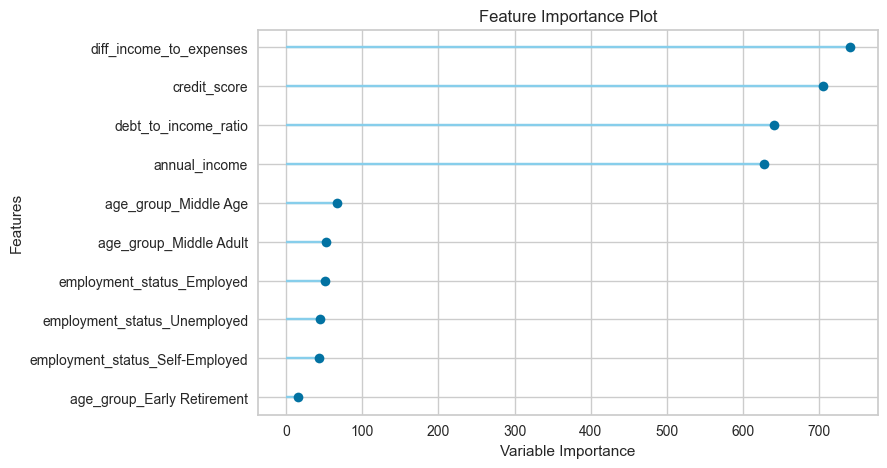

In [34]:
plot_model(best, plot = 'feature')

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [36]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8502,0.8177,0.9327,0.8505,0.8897,0.6580,0.6648


In [37]:
holdout_pred.head()

,age_group,employment_status,credit_score,annual_income,diff_income_to_expenses,debt_to_income_ratio,loan_approval_status,prediction_label,prediction_score
28564,Middle Adult,Employed,751,86470,4583.833496,0.022817,1,1,0.7988
46072,Middle Age,Employed,768,129465,7198.750000,0.016908,1,1,0.8746
3528,Middle Age,Employed,777,54472,3791.333252,0.002515,0,1,0.8724
14435,Middle Age,Unemployed,716,95562,6981.500000,0.131423,1,1,0.8535
8727,Middle Age,Self-Employed,785,91181,3316.416748,0.123754,1,1,0.8568


In [38]:
new_data = data.copy()
new_data.drop('loan_approval_status', axis=1, inplace=True)
new_data.head()

,age_group,employment_status,credit_score,annual_income,diff_income_to_expenses,debt_to_income_ratio
0,Middle Adult,Employed,743,139901,9125.416667,0.141686
1,Middle Adult,Employed,468,21162,-2277.500000,0.865750
2,Middle Age,Self-Employed,389,27815,-1135.083333,0.497969
3,Middle Adult,Self-Employed,778,137853,8755.750000,0.207525
4,Middle Adult,Employed,752,81753,5164.750000,0.107397


In [39]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,age_group,employment_status,credit_score,annual_income,diff_income_to_expenses,debt_to_income_ratio,prediction_label,prediction_score
0,Middle Adult,Employed,743,139901,9125.416992,0.141686,1,0.8710
1,Middle Adult,Employed,468,21162,-2277.500000,0.865750,0,0.7721
2,Middle Age,Self-Employed,389,27815,-1135.083374,0.497969,0,0.8511
3,Middle Adult,Self-Employed,778,137853,8755.750000,0.207525,1,0.8676
4,Middle Adult,Employed,752,81753,5164.750000,0.107397,1,0.8598


In [40]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50499 entries, 0 to 50498
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age_group                50499 non-null  category
 1   employment_status        50499 non-null  category
 2   credit_score             50499 non-null  int32   
 3   annual_income            50499 non-null  int32   
 4   diff_income_to_expenses  50499 non-null  float32 
 5   debt_to_income_ratio     50499 non-null  float32 
 6   prediction_label         50499 non-null  int32   
 7   prediction_score         50499 non-null  float64 
dtypes: category(2), float32(2), float64(1), int32(3)
memory usage: 1.4 MB


In [42]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\User\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['credit_score', 'annual_income',
                                             'diff_income_to_expenses',
                                             'debt_to_income_ratio'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strate...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=123,
                                reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

In [43]:
predictions.to_csv('predictions_label_dataset.csv', index=False)